In [591]:
import pandas as pd
import datetime
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
from pmdarima import auto_arima
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [335]:
path = '~/Downloads/park-ride-rapperswil.csv'

In [336]:
df = pd.read_csv(path, sep=';')

In [337]:
df['Datum'] = pd.to_datetime(df['Datum'])

In [338]:
df = df.rename(columns={'Datum': 'date', 'BELEGUNGSQUOTE (%)': 'occupancy_rate'})

In [339]:
df['date'] = df['date'].apply(lambda x: x.replace(tzinfo=None))

In [340]:
df = df.sort_values(by="date")


In [341]:
#df['occupancy_rate'] = df['occupancy_rate'] - df['occupancy_rate'].shift(1) 

In [342]:
df_train = df[df['date']<datetime.datetime(2021, 2,1)]

In [343]:
df_test = df[df['date'] > datetime.datetime(2021, 2,1)]

In [344]:
df = df.groupby("date").mean()

In [320]:
df

,occupancy_rate
date,
2020-06-01 01:00:00,12.582781
2020-06-01 02:00:00,6.993007
2020-06-01 03:00:00,7.284768
2020-06-01 04:00:00,7.342657
2020-06-01 05:00:00,6.643357
...,...
2021-02-27 20:00:00,23.000000
2021-02-27 21:00:00,25.157233
2021-02-27 22:00:00,24.842767


In [323]:
stepwise_model = auto_arima(df['occupancy_rate'], seasonal=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=44559.542, Time=1.52 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=48230.692, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=44730.519, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=45428.790, Time=0.56 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=48228.692, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=44557.627, Time=0.64 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=44673.701, Time=0.70 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=44592.272, Time=0.47 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=44558.621, Time=2.57 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=44565.548, Time=0.79 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=44577.323, Time=0.64 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=44559.195, Time=4.59 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=44555.627, Time=0.32 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=44671.701, Time=0.33 sec
 ARIMA(1,1,1)(0,0,0

In [331]:
stepwise_model.fit(df_train['occupancy_rate'])

ARIMA(order=(1, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [332]:
pred = stepwise_model.predict(n_periods=len(df_test))

In [333]:
pred

array([11.2014215 , 11.42690692, 11.51196728, 11.54405478, 11.55615922,
       11.5607254 , 11.56244791, 11.5630977 , 11.56334282, 11.56343529,
       11.56347017, 11.56348333, 11.56348829, 11.56349016, 11.56349087,
       11.56349114, 11.56349124, 11.56349127, 11.56349129, 11.56349129,
       11.5634913 , 11.5634913 , 11.5634913 , 11.5634913 , 11.5634913 ,
       11.5634913 , 11.5634913 , 11.5634913 , 11.5634913 , 11.5634913 ,
       11.5634913 , 11.5634913 , 11.5634913 , 11.5634913 , 11.5634913 ,
       11.5634913 , 11.5634913 , 11.5634913 , 11.5634913 , 11.5634913 ,
       11.5634913 , 11.5634913 , 11.5634913 , 11.5634913 , 11.5634913 ,
       11.5634913 , 11.5634913 , 11.5634913 , 11.5634913 , 11.5634913 ,
       11.5634913 , 11.5634913 , 11.5634913 , 11.5634913 , 11.5634913 ,
       11.5634913 , 11.5634913 , 11.5634913 , 11.5634913 , 11.5634913 ,
       11.5634913 , 11.5634913 , 11.5634913 , 11.5634913 , 11.5634913 ,
       11.5634913 , 11.5634913 , 11.5634913 , 11.5634913 , 11.56

In [175]:
model=ARIMA(df_train['occupancy_rate'],order=(1,1,2))
model_fit=model.fit()
model_fit.summary()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. fo

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:       D.occupancy_rate   No. Observations:                 5696
Model:                 ARIMA(1, 1, 2)   Log Likelihood              -20346.001
Method:                       css-mle   S.D. of innovations              8.607
Date:                Sat, 20 Mar 2021   AIC                          40702.002
Time:                        01:53:32   BIC                          40735.240
Sample:                             1   HQIC                         40713.575
                                                                              
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.0031      0.001     -2.595      0.009      -0.005      -0.001
ar.L1.D.occupancy_rate     0.9084      0.006    160.985      0.000       0.897       0.919
ma.L1.D.occupancy_rate    -0.4148      0.009    -48.034      0.000      -0.432      -0.398
ma.L2.D.occupancy_rate    -0.5852      0.009    -67.821      0.000      -0.602      -0.568
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1009           +0.0000j            1.1009            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2           -1.7089           +0.0000j            1.7089            0.5000
-----------------------------------------------------------------------------
"""

In [239]:
start = len(df_train) 
end = len(df_train) + len(df_test) - 1

In [191]:
pred=model_fit.predict(start=start,end=end,typ="levels")

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [240]:
pred.head(50)

5696    13.089968
5697    15.118477
5698    16.960842
5699    18.634119
5700    20.153799
5701    21.533957
5702    22.787375
5703    23.925666
5704    24.959378
5705    25.898094
5706    26.750517
5707    27.524554
5708    28.227386
5709    28.865539
5710    29.444938
5711    29.970966
5712    30.448513
5713    30.882022
5714    31.275528
5715    31.632695
5716    31.956853
5717    32.251027
5718    32.517964
5719    32.760159
5720    32.979880
5721    33.179185
5722    33.359945
5723    33.523860
5724    33.672472
5725    33.807185
5726    33.929270
5727    34.039886
5728    34.140083
5729    34.230816
5730    34.312952
5731    34.387279
5732    34.454512
5733    34.515301
5734    34.570236
5735    34.619855
5736    34.664643
5737    34.705044
5738    34.741460
5739    34.774255
5740    34.803762
5741    34.830281
5742    34.854087
5743    34.875429
5744    34.894531
5745    34.911599
dtype: float64

In [241]:
len(df_test)

648

In [225]:
len(pred)

648

In [269]:
sm_test = df_test.iloc[:50]

In [270]:
sm_test

,date,occupancy_rate,pred
5405,2021-02-01 01:00:00,15.909091,13.089968
1563,2021-02-01 02:00:00,13.333333,15.118477
2875,2021-02-01 03:00:00,14.666667,16.960842
1564,2021-02-01 04:00:00,14.432990,18.634119
4148,2021-02-01 05:00:00,18.666667,20.153799
1565,2021-02-01 06:00:00,22.000000,21.533957
1566,2021-02-01 07:00:00,31.443299,22.787375
4149,2021-02-01 08:00:00,60.309278,23.925666
5406,2021-02-01 09:00:00,76.804124,24.959378
254,2021-02-01 10:00:00,79.896907,25.898094


In [257]:
df_test['pred'] = list(pred)

In [268]:
df_test.iloc[200:250]

,date,occupancy_rate,pred
5441,2021-02-09 09:00:00,65.408805,34.643958
298,2021-02-09 10:00:00,71.069182,34.640862
1607,2021-02-09 11:00:00,64.465409,34.637765
299,2021-02-09 12:00:00,58.805031,34.634669
5442,2021-02-09 13:00:00,61.635220,34.631572
1608,2021-02-09 14:00:00,75.581395,34.628476
5443,2021-02-09 15:00:00,66.981132,34.625380
4183,2021-02-09 16:00:00,67.295597,34.622283
4184,2021-02-09 17:00:00,62.389381,34.619187
5444,2021-02-09 18:00:00,38.372093,34.616091


In [256]:
type(pred)

pandas.core.series.Series

In [264]:
mse = abs(df_test['occupancy_rate']-df_test['pred'])

In [265]:
sum(mse)

15069.040731227547

In [208]:
pred.isnull().sum()

0

In [212]:
df_test['pred'].isnull().sum()

648

In [199]:
pred.index = df.index[start:6345]

ValueError: Length mismatch: Expected axis has 648 elements, new values have 647 elements

In [201]:
pred.tail(50)

6294    33.411594
6295    33.408498
6296    33.405401
6297    33.402305
6298    33.399209
6299    33.396112
6300    33.393016
6301    33.389919
6302    33.386823
6303    33.383727
6304    33.380630
6305    33.377534
6306    33.374437
6307    33.371341
6308    33.368245
6309    33.365148
6310    33.362052
6311    33.358955
6312    33.355859
6313    33.352763
6314    33.349666
6315    33.346570
6316    33.343473
6317    33.340377
6318    33.337281
6319    33.334184
6320    33.331088
6321    33.327992
6322    33.324895
6323    33.321799
6324    33.318702
6325    33.315606
6326    33.312510
6327    33.309413
6328    33.306317
6329    33.303220
6330    33.300124
6331    33.297028
6332    33.293931
6333    33.290835
6334    33.287738
6335    33.284642
6336    33.281546
6337    33.278449
6338    33.275353
6339    33.272256
6340    33.269160
6341    33.266064
6342    33.262967
6343    33.259871
dtype: float64

(array([73., 49., 38., 30., 26., 22., 19., 18., 15., 14., 13., 12., 11.,
        11., 10.,  9.,  9.,  8.,  8.,  7.,  7.,  7.,  7.,  6.,  6.,  6.,
         6.,  5.,  5.,  5.,  5.,  5.,  5.,  4.,  5.,  4.,  4.,  4.,  4.,
         4.,  4.,  3.,  4.,  3.,  4.,  3.,  4.,  3.,  3.,  3.,  3.,  3.,
         3.,  3.,  3.,  2.,  3.,  3.,  3.,  2.,  3.,  2.,  3.,  2.,  2.,
         3.,  2.,  2.,  3.,  2.,  2.,  2.,  2.,  3.,  2.,  2.,  2.,  2.,
         2.,  2.,  2.,  2.,  1.,  2.,  2.,  2.,  2.,  2.,  1.,  2.,  2.,
         1.,  2.,  2.,  1.,  2.,  2.,  1.,  2.,  2.]),
 array([3.70249176e+12, 3.70364419e+12, 3.70479661e+12, 3.70594904e+12,
        3.70710147e+12, 3.70825389e+12, 3.70940632e+12, 3.71055875e+12,
        3.71171118e+12, 3.71286360e+12, 3.71401603e+12, 3.71516846e+12,
        3.71632088e+12, 3.71747331e+12, 3.71862574e+12, 3.71977817e+12,
        3.72093059e+12, 3.72208302e+12, 3.72323545e+12, 3.72438787e+12,
        3.72554030e+12, 3.72669273e+12, 3.72784516e+12, 3.72899758e+12,
  

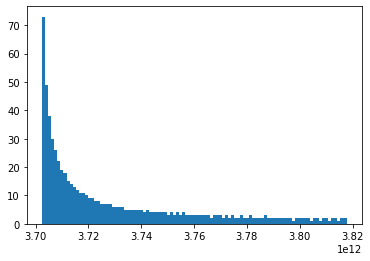

In [65]:
plt.hist(df['forecast'], bins=100)

In [334]:
# dataframe opertations - pandas
import pandas as pd
# plotting data - matplotlib
from matplotlib import pyplot as plt
# time series - statsmodels 
# Seasonality decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose 
# holt winters 
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [346]:
df_train

,date,occupancy_rate
3290,2020-06-01 01:00:00,12.582781
4524,2020-06-01 02:00:00,6.993007
2020,2020-06-01 03:00:00,7.284768
5814,2020-06-01 04:00:00,7.342657
5815,2020-06-01 05:00:00,6.643357
...,...,...
1849,2021-01-30 20:00:00,14.432990
3144,2021-01-30 21:00:00,10.112360
551,2021-01-30 22:00:00,10.112360
3145,2021-01-30 23:00:00,10.112360


In [345]:
df_test

,date,occupancy_rate
5405,2021-02-01 01:00:00,15.909091
1563,2021-02-01 02:00:00,13.333333
2875,2021-02-01 03:00:00,14.666667
1564,2021-02-01 04:00:00,14.432990
4148,2021-02-01 05:00:00,18.666667
...,...,...
408,2021-02-27 20:00:00,23.000000
1697,2021-02-27 21:00:00,25.157233
3000,2021-02-27 22:00:00,24.842767
1698,2021-02-27 23:00:00,20.666667


In [496]:
occupancy = df.iloc[:]
occupancy_train = df_train.iloc[:]
occupancy_test = df_test.iloc[:]

In [361]:
len(occopancy_test)

648

In [354]:
occupancy['HWES3_ADD'] = ExponentialSmoothing(occupancy['occupancy_rate'],
                                            trend='add',seasonal='add',seasonal_periods=24).fit().fittedvalues
occupancy['HWES3_MUL'] = ExponentialSmoothing(occupancy['occupancy_rate'],
                                            trend='mul',seasonal='mul',seasonal_periods=24).fit().fittedvalues
#airline[[‘Thousands of Passengers’,’HWES3_ADD’,’HWES3_MUL’]].plot(title=’Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality’);


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [581]:
train_hw = ExponentialSmoothing(occupancy_train['occupancy_rate'],
                                            trend=None,seasonal='mul',seasonal_periods=24).fit()


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


In [582]:
pred = train_hw.forecast(len(occupancy_test))

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


<AxesSubplot:>

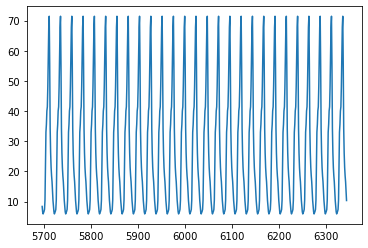

In [583]:
pred.plot()

In [584]:
occupancy_test.set_index('date', inplace=True)

KeyError: "None of ['date'] are in the columns"

In [585]:
occupancy_test['pred'] = list(pred)

<AxesSubplot:xlabel='date'>

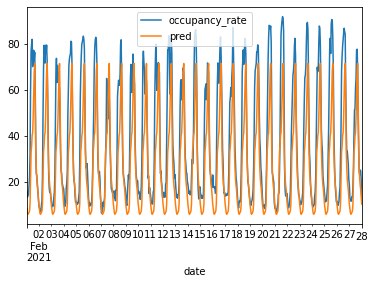

In [586]:
occupancy_test.plot()

In [483]:
max(pred)

71.4572520187714

In [490]:
occupancy_test.iloc[:50]

,date,occupancy_rate,pred
5405,2021-02-01 01:00:00,15.909091,8.380982
1563,2021-02-01 02:00:00,13.333333,6.602357
2875,2021-02-01 03:00:00,14.666667,5.902885
1564,2021-02-01 04:00:00,14.432990,6.325560
4148,2021-02-01 05:00:00,18.666667,6.759398
1565,2021-02-01 06:00:00,22.000000,7.395603
1566,2021-02-01 07:00:00,31.443299,10.475238
4149,2021-02-01 08:00:00,60.309278,23.019279
5406,2021-02-01 09:00:00,76.804124,32.987350
254,2021-02-01 10:00:00,79.896907,35.578330


In [470]:
occupancy_test

,date,occupancy_rate,pred
5405,2021-02-01 01:00:00,15.909091,8.380982
1563,2021-02-01 02:00:00,13.333333,6.602357
2875,2021-02-01 03:00:00,14.666667,5.902885
1564,2021-02-01 04:00:00,14.432990,6.325560
4148,2021-02-01 05:00:00,18.666667,6.759398
...,...,...,...
408,2021-02-27 20:00:00,23.000000,21.332555
1697,2021-02-27 21:00:00,25.157233,18.552308
3000,2021-02-27 22:00:00,24.842767,16.542956
1698,2021-02-27 23:00:00,20.666667,13.474264


In [590]:
occupancy_test

,occupancy_rate,pred
date,,
2021-02-01 01:00:00,15.909091,8.380982
2021-02-01 02:00:00,13.333333,6.602357
2021-02-01 03:00:00,14.666667,5.902885
2021-02-01 04:00:00,14.432990,6.325560
2021-02-01 05:00:00,18.666667,6.759398
...,...,...
2021-02-27 20:00:00,23.000000,21.332555
2021-02-27 21:00:00,25.157233,18.552308
2021-02-27 22:00:00,24.842767,16.542956


In [592]:
mse = mean_squared_error(occupancy_test['occupancy_rate'], occupancy_test['pred'])
mae = mean_absolute_error(occupancy_test['occupancy_rate'], occupancy_test['pred'])

In [594]:
mse

264.0893204190605

In [593]:
mae

11.795668526490811

In [489]:
sum(mse)

171129.87963155107

In [487]:
occupancy_test.head(50)

,date,occupancy_rate,pred
5405,2021-02-01 01:00:00,15.909091,8.380982
1563,2021-02-01 02:00:00,13.333333,6.602357
2875,2021-02-01 03:00:00,14.666667,5.902885
1564,2021-02-01 04:00:00,14.432990,6.325560
4148,2021-02-01 05:00:00,18.666667,6.759398
1565,2021-02-01 06:00:00,22.000000,7.395603
1566,2021-02-01 07:00:00,31.443299,10.475238
4149,2021-02-01 08:00:00,60.309278,23.019279
5406,2021-02-01 09:00:00,76.804124,32.987350
254,2021-02-01 10:00:00,79.896907,35.578330


In [580]:
occupancy_test.score()

AttributeError: 'DataFrame' object has no attribute 'score'